### Import libraries

In [285]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM,GRU
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

# Data processing


In [286]:
import pandas as pd
nov = pd.read_csv('NovAll.csv')
apr =pd.read_csv('AprilAll.csv')
nov_apr =pd.read_csv('April_Nov.csv')

In [287]:
nov['Time1'] = nov['Time'].str.replace('_', '')
apr['Time1'] = apr['Time'].str.replace('_', '')
nov_apr['Time1'] = nov_apr['Time'].str.replace('_', '')

In [288]:
nov['time_corrected']= pd.to_datetime(nov['Time1'], format='%Y%m%d%H', errors='coerce')
apr['time_corrected']= pd.to_datetime(apr['Time1'], format='%Y%m%d%H', errors='coerce')
nov_apr['time_corrected']= pd.to_datetime(nov_apr['Time1'], format='%Y%m%d%H', errors='coerce')

In [289]:
nov.set_index('time_corrected', inplace=True)
apr.set_index('time_corrected', inplace=True)
nov_apr.set_index('time_corrected', inplace=True)

In [290]:
nov = nov.drop(['Time','Time1'],axis=1)
apr = apr.drop(['Time','Time1'],axis=1)
nov_apr = nov_apr.drop(['Time','Time1'],axis=1)

In [291]:
print(nov.isnull().sum())
print(apr.isnull().sum())
print(nov_apr.isnull().sum())

traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64
traffic information    0
RP                     0
dtype: int64


In [292]:
nov.columns = nov.columns.str.strip()
apr.columns = apr.columns.str.strip()
nov_apr.columns = nov_apr.columns.str.strip()

# Part B

# SVM, DNN, RBF

## Univariate SVM

In [293]:
nov_apr.head()

traffic information    RP
time_corrected                                
2015-04-01 00:00:00                 78.6  91.7
2015-04-01 01:00:00                 80.0  93.7
2015-04-01 02:00:00                 80.1  91.4
2015-04-01 03:00:00                 80.0  92.7
2015-04-01 04:00:00                 79.0  93.5

In [294]:
nov_apr_1 = nov_apr.copy()

In [295]:
name=[]
name1=[]
v=[]
v1=[]
nam=[]
name1s=[]
vs=[]
v1s=[]

In [296]:

nov_apr_1 = nov_apr_1.reset_index()
nov_apr_1['hour'] = nov_apr_1['time_corrected'].dt.hour
nov_apr_1['WEEKDAY'] = (((nov_apr_1.time_corrected).dt.dayofweek) // 5 == 1).astype(float)

In [297]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(1200, 2) (1200,) (188, 2) (188,)


In [298]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

SVR()

In [299]:
predict = regressor.predict(test_X)

In [300]:
mae_svm_nov_apr_uni = mean_absolute_error(test_y, predict)
name.append('SVM_MAE')
v.append(mae_svm_nov_apr_uni)
print (mae_svm_nov_apr_uni)

1.5594998767033987


In [301]:
mse_svm_nov_apr_uni = ((test_y-predict)**2).mean()

In [302]:
nam.append('SVM_MSE')
vs.append(mse_svm_nov_apr_uni)
print (mse_svm_nov_apr_uni)


4.221012384873484


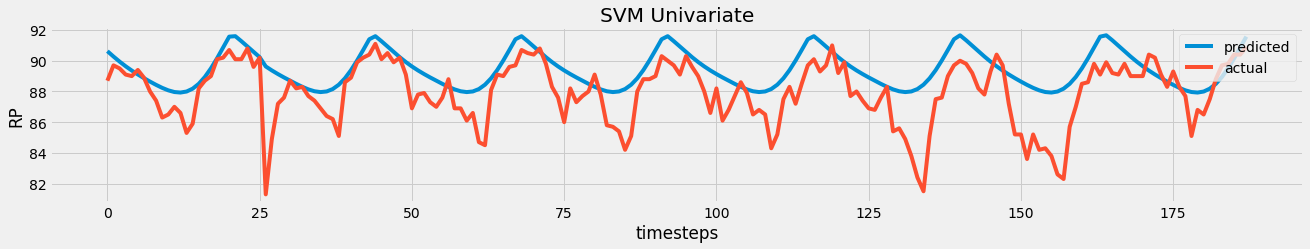

In [303]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate SVM

In [304]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [305]:
#fitting the SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(train_X, train_y)

SVR()

In [306]:
predict = regressor.predict(test_X)

In [307]:
from sklearn.metrics import mean_absolute_error
mae_svm_nov_apr_multi=mean_absolute_error(test_y, predict)

In [308]:
name1.append('MULTI_SVM_MAE')
v1.append(mae_svm_nov_apr_multi)
print (mae_svm_nov_apr_multi)



1.6452997544508723


In [309]:
mse_svm_nov_apr_multi = mean_squared_error(test_y, predict)

In [310]:
name1s.append('MULTI_SVM_MSE')
v1s.append(mse_svm_nov_apr_multi)
print (mse_svm_nov_apr_multi)



4.876176039479171


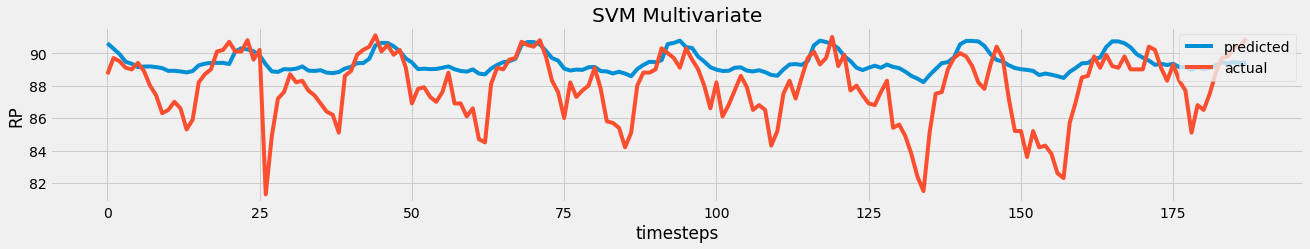

In [311]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predict)
plt.plot(test_y.values)
plt.title('SVM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# DNN

## Univariate

In [312]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [313]:
nov_apr_uni = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200
train = nov_apr_uni[:1200]
test =nov_apr_uni[1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 2) (1200,) (188, 2) (188,)


1. Define a sequential model
2. Add some dense layers
3. Use ‘relu’ as the activation function for the hidden layers
4. Use a ‘normal’ initializer as the kernal_intializer
(Initializers define the way to set the initial random weights of Keras layers.)
5. We will use mean_absolute_error as a loss function
6. Define the output layer with only one node
7. Use ‘linear ’as the activation function for the output layer



Creating DNN architechure with 1 input layer with 128 neurorns for provinding the train data and 3 hidden layers.
As it is regression there is only 1 neuron at the output. The optimization is done using ADAM optimizer with mean absolute error as loss function

In [314]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 128)               384       
_________________________________________________________________
dense_48 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_49 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_50 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 257       
Total params: 165,249
Trainable params: 165,249
Non-trainable params: 0
_________________________________________________________________


Define a checkpoint callback :

In [315]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


 Train the model :

In [316]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
29/30 [============================>.] - ETA: 0s - loss: 67.8884 - mean_absolute_error: 67.8884
Epoch 00001: val_loss improved from inf to 36.63081, saving model to Weights-001--36.63081.hdf5
30/30 [==============================] - 1s 21ms/step - loss: 67.0156 - mean_absolute_error: 67.0156 - val_loss: 36.6308 - val_mean_absolute_error: 36.6308
Epoch 2/100
24/30 [=======================>......] - ETA: 0s - loss: 34.7693 - mean_absolute_error: 34.7693
Epoch 00002: val_loss improved from 36.63081 to 30.98554, saving model to Weights-002--30.98554.hdf5
30/30 [==============================] - 0s 8ms/step - loss: 34.6753 - mean_absolute_error: 34.6753 - val_loss: 30.9855 - val_mean_absolute_error: 30.9855
Epoch 3/100
26/30 [=========================>....] - ETA: 0s - loss: 27.8584 - mean_absolute_error: 27.8584
Epoch 00003: val_loss improved from 30.98554 to 21.46628, saving model to Weights-003--21.46628.hdf5
30/30 [==============================] - 0s 9ms/step - loss: 27.091

Epoch 26/100
21/30 [====================>.........] - ETA: 0s - loss: 2.1110 - mean_absolute_error: 2.1110
Epoch 00026: val_loss did not improve from 1.08385
30/30 [==============================] - 0s 9ms/step - loss: 2.2491 - mean_absolute_error: 2.2491 - val_loss: 1.1045 - val_mean_absolute_error: 1.1045
Epoch 27/100
28/30 [===========================>..] - ETA: 0s - loss: 1.4531 - mean_absolute_error: 1.4531
Epoch 00027: val_loss did not improve from 1.08385
30/30 [==============================] - 0s 9ms/step - loss: 1.4478 - mean_absolute_error: 1.4478 - val_loss: 2.2091 - val_mean_absolute_error: 2.2091
Epoch 28/100
28/30 [===========================>..] - ETA: 0s - loss: 1.3560 - mean_absolute_error: 1.3560
Epoch 00028: val_loss did not improve from 1.08385
30/30 [==============================] - 0s 9ms/step - loss: 1.3718 - mean_absolute_error: 1.3718 - val_loss: 2.0309 - val_mean_absolute_error: 2.0309
Epoch 29/100
25/30 [========================>.....] - ETA: 0s - loss: 1.4

Epoch 53/100
29/30 [============================>.] - ETA: 0s - loss: 1.2824 - mean_absolute_error: 1.2824
Epoch 00053: val_loss did not improve from 1.07663
30/30 [==============================] - 0s 8ms/step - loss: 1.2954 - mean_absolute_error: 1.2954 - val_loss: 1.1982 - val_mean_absolute_error: 1.1982
Epoch 54/100
29/30 [============================>.] - ETA: 0s - loss: 1.3893 - mean_absolute_error: 1.3893
Epoch 00054: val_loss did not improve from 1.07663
30/30 [==============================] - 0s 8ms/step - loss: 1.3824 - mean_absolute_error: 1.3824 - val_loss: 2.4306 - val_mean_absolute_error: 2.4306
Epoch 55/100
24/30 [=======================>......] - ETA: 0s - loss: 2.0201 - mean_absolute_error: 2.0201
Epoch 00055: val_loss did not improve from 1.07663
30/30 [==============================] - 0s 7ms/step - loss: 2.1237 - mean_absolute_error: 2.1237 - val_loss: 3.0714 - val_mean_absolute_error: 3.0714
Epoch 56/100
25/30 [========================>.....] - ETA: 0s - loss: 1.5

Epoch 80/100
23/30 [======================>.......] - ETA: 0s - loss: 1.1308 - mean_absolute_error: 1.1308
Epoch 00080: val_loss did not improve from 1.07663
30/30 [==============================] - 0s 6ms/step - loss: 1.1955 - mean_absolute_error: 1.1955 - val_loss: 2.4603 - val_mean_absolute_error: 2.4603
Epoch 81/100
23/30 [======================>.......] - ETA: 0s - loss: 1.3655 - mean_absolute_error: 1.3655
Epoch 00081: val_loss did not improve from 1.07663
30/30 [==============================] - 0s 7ms/step - loss: 1.3123 - mean_absolute_error: 1.3123 - val_loss: 2.0896 - val_mean_absolute_error: 2.0896
Epoch 82/100
23/30 [======================>.......] - ETA: 0s - loss: 1.4894 - mean_absolute_error: 1.4894
Epoch 00082: val_loss did not improve from 1.07663
30/30 [==============================] - 0s 7ms/step - loss: 1.4401 - mean_absolute_error: 1.4401 - val_loss: 3.5135 - val_mean_absolute_error: 3.5135
Epoch 83/100
24/30 [=======================>......] - ETA: 0s - loss: 1.3

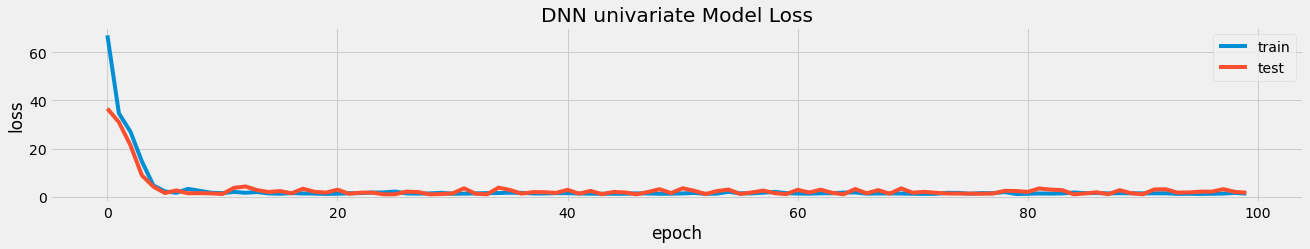

In [317]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN univariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [318]:
# Load wights file of the best model :/content/Weights-049--0.01040.hdf5
wights_file = 'Weights-047--1.07663.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [319]:
predictions = NN_model.predict(test_X)

In [320]:
name.append('DNN_Univariate_MAE')
v.append(metrics.mean_absolute_error(test_y, predictions.ravel()))


from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions.ravel())) 


Mean Absolute Error: 0.9973973294521904


In [321]:
nam.append('DNN_Univariate_MSE')
vs.append(metrics.mean_squared_error(test_y, predictions.ravel()))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions.ravel())) 

Mean Squared Error: 1.8138532036112287


In [322]:
DNN_univariate_mae =  metrics.mean_absolute_error(test_y*100, predictions.ravel()*100)

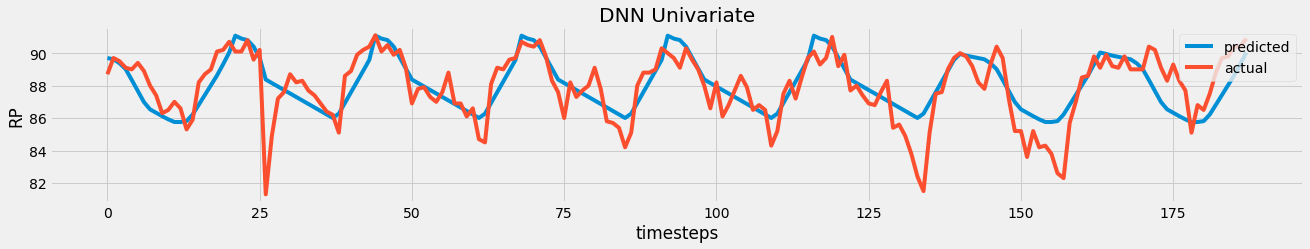

In [323]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [324]:
nov_apr_multi = nov_apr_1.drop('time_corrected',axis =1)
n_train_time = 1200 
train = nov_apr_multi [:1200]
test =nov_apr_multi [1200:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[['traffic information','hour',	'WEEKDAY']], train['RP']
test_X, test_y = test[['traffic information','hour','WEEKDAY']], test['RP']

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 3) (1200,) (188, 3) (188,)


In [325]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 128)               512       
_________________________________________________________________
dense_53 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_54 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 257       
Total params: 165,377
Trainable params: 165,377
Non-trainable params: 0
_________________________________________________________________


In [326]:
from keras.callbacks import ModelCheckpoint
checkpoint_name = 'Weightsmulti-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [327]:
history = NN_model.fit(train_X, train_y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
25/30 [========================>.....] - ETA: 0s - loss: 51.7201 - mean_absolute_error: 51.7201
Epoch 00001: val_loss improved from inf to 2.76429, saving model to Weightsmulti-001--2.76429.hdf5
30/30 [==============================] - 0s 12ms/step - loss: 44.9810 - mean_absolute_error: 44.9810 - val_loss: 2.7643 - val_mean_absolute_error: 2.7643
Epoch 2/100
25/30 [========================>.....] - ETA: 0s - loss: 4.6222 - mean_absolute_error: 4.6222
Epoch 00002: val_loss did not improve from 2.76429
30/30 [==============================] - 0s 7ms/step - loss: 4.2140 - mean_absolute_error: 4.2140 - val_loss: 3.4587 - val_mean_absolute_error: 3.4587
Epoch 3/100
25/30 [========================>.....] - ETA: 0s - loss: 1.4482 - mean_absolute_error: 1.4482
Epoch 00003: val_loss improved from 2.76429 to 2.41673, saving model to Weightsmulti-003--2.41673.hdf5
30/30 [==============================] - 0s 9ms/step - loss: 1.4401 - mean_absolute_error: 1.4401 - val_loss: 2.4167 - val

Epoch 27/100
29/30 [============================>.] - ETA: 0s - loss: 1.5098 - mean_absolute_error: 1.5098
Epoch 00027: val_loss did not improve from 1.08560
30/30 [==============================] - 0s 9ms/step - loss: 1.5053 - mean_absolute_error: 1.5053 - val_loss: 1.8821 - val_mean_absolute_error: 1.8821
Epoch 28/100
22/30 [=====================>........] - ETA: 0s - loss: 1.2989 - mean_absolute_error: 1.2989
Epoch 00028: val_loss did not improve from 1.08560
30/30 [==============================] - 0s 7ms/step - loss: 1.3386 - mean_absolute_error: 1.3386 - val_loss: 1.8373 - val_mean_absolute_error: 1.8373
Epoch 29/100
20/30 [===================>..........] - ETA: 0s - loss: 1.2308 - mean_absolute_error: 1.2308
Epoch 00029: val_loss did not improve from 1.08560
30/30 [==============================] - 0s 9ms/step - loss: 1.2602 - mean_absolute_error: 1.2602 - val_loss: 1.7848 - val_mean_absolute_error: 1.7848
Epoch 30/100
26/30 [=========================>....] - ETA: 0s - loss: 1.3

23/30 [======================>.......] - ETA: 0s - loss: 1.6758 - mean_absolute_error: 1.6758
Epoch 00053: val_loss did not improve from 1.04657
30/30 [==============================] - 0s 7ms/step - loss: 1.5995 - mean_absolute_error: 1.5995 - val_loss: 2.6144 - val_mean_absolute_error: 2.6144
Epoch 54/100
29/30 [============================>.] - ETA: 0s - loss: 1.3781 - mean_absolute_error: 1.3781
Epoch 00054: val_loss did not improve from 1.04657
30/30 [==============================] - 0s 6ms/step - loss: 1.3903 - mean_absolute_error: 1.3903 - val_loss: 1.9786 - val_mean_absolute_error: 1.9786
Epoch 55/100
29/30 [============================>.] - ETA: 0s - loss: 1.7057 - mean_absolute_error: 1.7057
Epoch 00055: val_loss did not improve from 1.04657
30/30 [==============================] - 0s 6ms/step - loss: 1.6863 - mean_absolute_error: 1.6863 - val_loss: 3.6543 - val_mean_absolute_error: 3.6543
Epoch 56/100
29/30 [============================>.] - ETA: 0s - loss: 1.4094 - mean_ab

Epoch 80/100
23/30 [======================>.......] - ETA: 0s - loss: 1.2985 - mean_absolute_error: 1.2985
Epoch 00080: val_loss did not improve from 1.04657
30/30 [==============================] - 0s 6ms/step - loss: 1.3053 - mean_absolute_error: 1.3053 - val_loss: 2.1106 - val_mean_absolute_error: 2.1106
Epoch 81/100
23/30 [======================>.......] - ETA: 0s - loss: 1.4259 - mean_absolute_error: 1.4259
Epoch 00081: val_loss did not improve from 1.04657
30/30 [==============================] - 0s 7ms/step - loss: 1.3959 - mean_absolute_error: 1.3959 - val_loss: 2.2614 - val_mean_absolute_error: 2.2614
Epoch 82/100
25/30 [========================>.....] - ETA: 0s - loss: 1.2990 - mean_absolute_error: 1.2990
Epoch 00082: val_loss did not improve from 1.04657
30/30 [==============================] - 0s 6ms/step - loss: 1.2694 - mean_absolute_error: 1.2694 - val_loss: 2.8713 - val_mean_absolute_error: 2.8713
Epoch 83/100
24/30 [=======================>......] - ETA: 0s - loss: 1.4

In [328]:
# Load wights file of the best model :/content//content/Weightsmulti-038--0.00989.hdf5
wights_file = 'Weightsmulti-008--1.08560.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mae', optimizer='adam', metrics=['mae'])

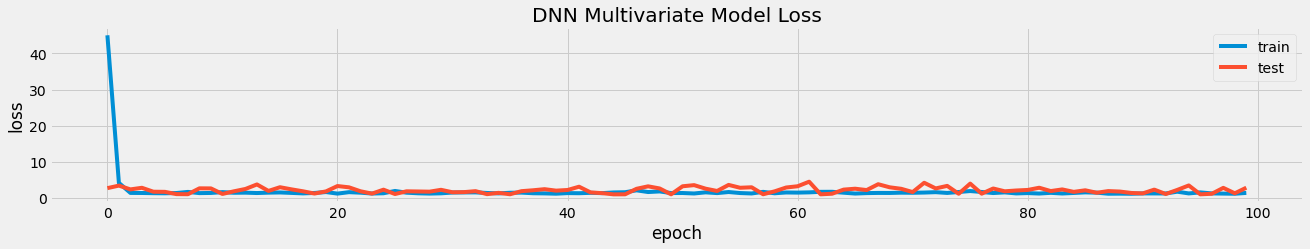

In [329]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Multivariate Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [330]:
predictions = NN_model.predict(test_X)

In [331]:
name1.append('DNN_Multivariate_MAE')
v1.append(metrics.mean_absolute_error(test_y, predictions.ravel()))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions.ravel())) 

Mean Absolute Error: 1.009128927677236


In [332]:
name1s.append('DNN_Multivariate_MSE')
v1s.append(metrics.mean_squared_error(test_y, predictions.ravel()))
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions.ravel())) 

Mean Squared Error: 1.7646130638506692


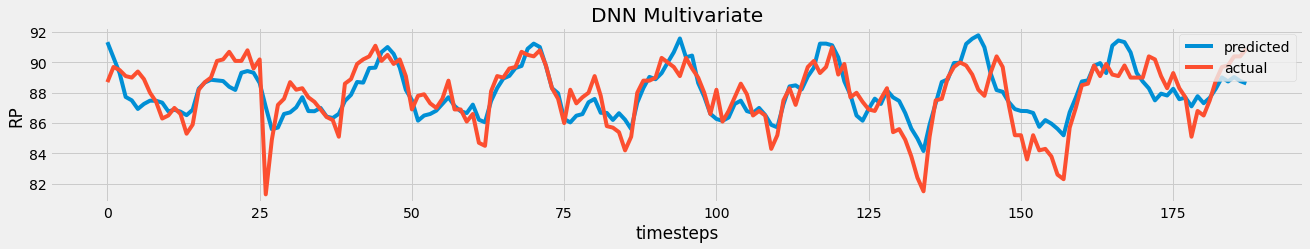

In [333]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(predictions)
plt.plot(test_y.values)
plt.title('DNN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# GRU


GRU is a type of RNN.
GRU’s were created as the solution to short-term memory.
They have internal mechanisms called gates that can regulate the flow of information.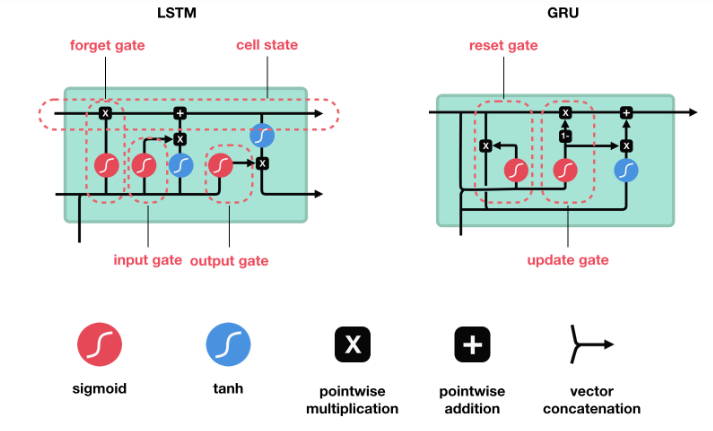

These gates can learn which data in a sequence is important to keep or throw away. By doing that, it can pass relevant information down the long chain of sequences to make predictions. Almost all state of the art results based on recurrent neural networks are achieved with these two networks. LSTM’s and GRU’s can be found in speech recognition, speech synthesis, and text generation. You can even use them to generate captions for videos.

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

## Univariate

In [334]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [335]:
nov_apr.head()

traffic information    RP
time_corrected                                
2015-04-01 00:00:00                 78.6  91.7
2015-04-01 01:00:00                 80.0  93.7
2015-04-01 02:00:00                 80.1  91.4
2015-04-01 03:00:00                 80.0  92.7
2015-04-01 04:00:00                 79.0  93.5

In [336]:
## resampling of data over hour for Nov
nov_apr_resample = nov_apr.resample('h').mean() 
nov_apr_resample.shape

(4296, 2)

In [337]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = nov_apr_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed_nov_apr = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
print(reframed_nov_apr.head())

   var1(t-1)  var2(t-1)   var1(t)   var2(t)
1   0.613333   0.728571  0.653333  0.728571
2   0.653333   0.728571  0.653333  0.714286
3   0.653333   0.714286  0.600000  0.628571
4   0.600000   0.628571  0.560000  0.685714
5   0.560000   0.685714  0.373333  0.557143


In [338]:
reframed_nov_apr_uni = reframed_nov_apr.drop(['var1(t-1)','var1(t)'],axis=1)

In [339]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [340]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mae', optimizer='adam')

print ('model compiled')

model compiled


In [341]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 2s 501ms/step - loss: 0.6148 - val_loss: 0.6419
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 0.5472 - val_loss: 0.5670
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 0.4755 - val_loss: 0.4858
Epoch 4/20
3/3 [==============================] - 0s 31ms/step - loss: 0.3971 - val_loss: 0.3965
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 0.3120 - val_loss: 0.2962
Epoch 6/20
3/3 [==============================] - 0s 31ms/step - loss: 0.2190 - val_loss: 0.1857
Epoch 7/20
3/3 [==============================] - 0s 32ms/step - loss: 0.1320 - val_loss: 0.0859
Epoch 8/20
3/3 [==============================] - 0s 34ms/step - loss: 0.0964 - val_loss: 0.0733
Epoch 9/20
3/3 [==============================] - 0s 31ms/step - loss: 0.1276 - val_loss: 0.0987
Epoch 10/20
3/3 [==============================] - 0s 31ms/step - loss: 0.1409 - val_loss: 0.0751
Epoch 11/20
3/3 [===========

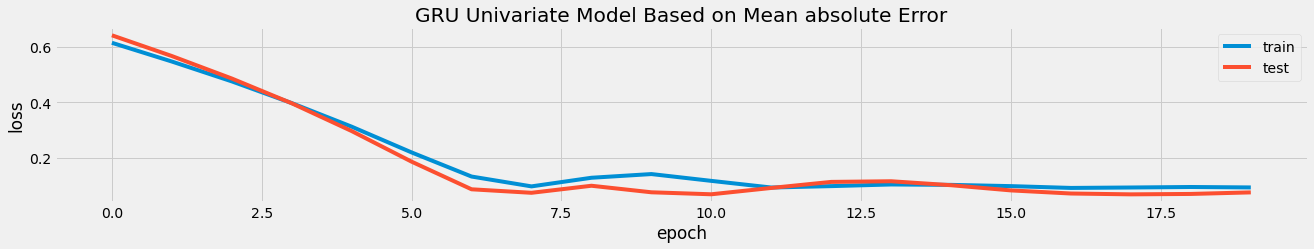

In [342]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Univariate Model Based on Mean absolute Error')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [343]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('GRU_Univariate_MAE (When loss=mae)')
v.append(mae_GRU_univariate)
nam.append('GRU_Univariate_MSE (When loss=mae)')
vs.append(mae_GRU_univariate1)
print('Test MAE: %.5f' % mae_GRU_univariate)
print('Test MSE: %.5f' % mae_GRU_univariate1)

Test MAE: 0.56081
Test MSE: 0.49024


In [344]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [345]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model compiled


In [346]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 374ms/step - loss: 0.4244 - val_loss: 0.4540
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 0.3430 - val_loss: 0.3633
Epoch 3/20
3/3 [==============================] - 0s 26ms/step - loss: 0.2694 - val_loss: 0.2782
Epoch 4/20
3/3 [==============================] - 0s 26ms/step - loss: 0.1996 - val_loss: 0.1988
Epoch 5/20
3/3 [==============================] - 0s 31ms/step - loss: 0.1378 - val_loss: 0.1277
Epoch 6/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0835 - val_loss: 0.0693
Epoch 7/20
3/3 [==============================] - 0s 27ms/step - loss: 0.0430 - val_loss: 0.0290
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0203 - val_loss: 0.0103
Epoch 9/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0147 - val_loss: 0.0093
Epoch 10/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0228 - val_loss: 0.0141
Epoch 11/20
3/3 [===========

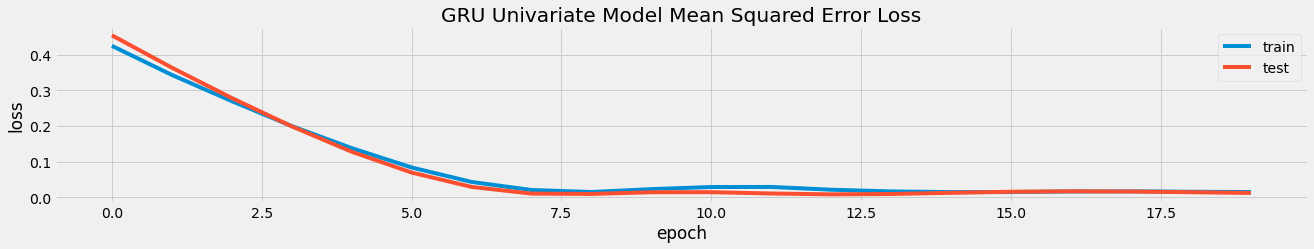

In [347]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Univariate Model Mean Squared Error Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [348]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('GRU_Univariate_MAE (When loss=mse)')
v.append(mae_GRU_univariate)
nam.append('GRU_Univariate_MSE (When loss=mse)')
vs.append(mae_GRU_univariate1)
print('Test MAE: %.5f' % mae_GRU_univariate)
print('Test MSE: %.5f' % mae_GRU_univariate1)

Test MAE: 0.69250
Test MSE: 0.67827


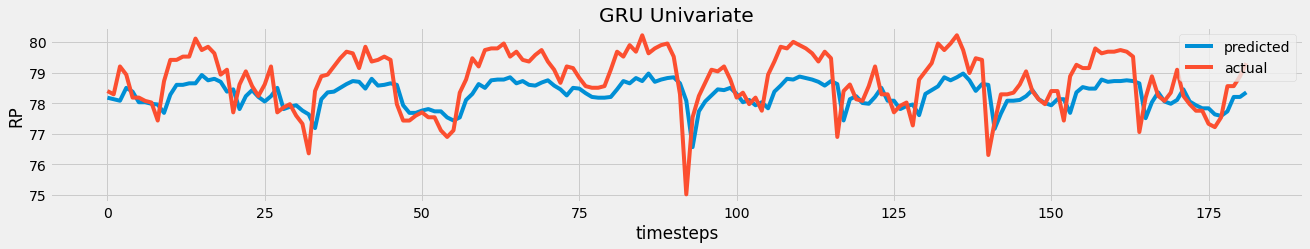

In [349]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [350]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [351]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],2)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mae', optimizer='adam')

print ('model compiled')

model compiled


In [352]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 307ms/step - loss: 0.6279 - val_loss: 0.6497
Epoch 2/20
3/3 [==============================] - 0s 29ms/step - loss: 0.5502 - val_loss: 0.5631
Epoch 3/20
3/3 [==============================] - 0s 31ms/step - loss: 0.4671 - val_loss: 0.4684
Epoch 4/20
3/3 [==============================] - 0s 29ms/step - loss: 0.3760 - val_loss: 0.3630
Epoch 5/20
3/3 [==============================] - 0s 29ms/step - loss: 0.2762 - val_loss: 0.2441
Epoch 6/20
3/3 [==============================] - 0s 29ms/step - loss: 0.1688 - val_loss: 0.1160
Epoch 7/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0980 - val_loss: 0.0591
Epoch 8/20
3/3 [==============================] - 0s 30ms/step - loss: 0.1183 - val_loss: 0.0929
Epoch 9/20
3/3 [==============================] - 0s 29ms/step - loss: 0.1394 - val_loss: 0.0752
Epoch 10/20
3/3 [==============================] - 0s 32ms/step - loss: 0.1218 - val_loss: 0.0581
Epoch 11/20
3/3 [===========

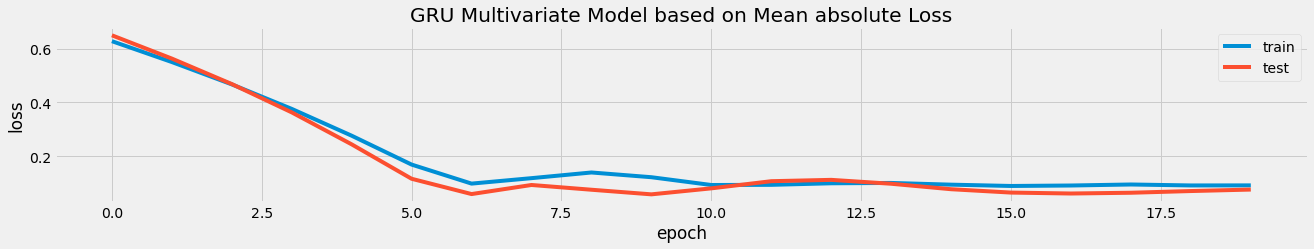

In [353]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Multivariate Model based on Mean absolute Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [354]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('GRU_Multivariate_MAE (When loss=mae)')
v1.append(mae_GRU_multivariate)
name1s.append('GRU_Multivariate_MSE (When loss=mae)')
v1s.append(mae_GRU_multivariate1)
print('Test MAE: %.5f' % mae_GRU_multivariate)
print('Test MSE: %.5f' % mae_GRU_multivariate1)


Test MAE: 0.56896
Test MSE: 0.48352


In [355]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [356]:
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(train_X.shape[1],2)))
model.add(Dropout(0.2))
model.add(GRU(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

model compiled


In [357]:
history = model.fit(train_X, train_y, batch_size=512, epochs=20, validation_data = (test_X, test_y))

Epoch 1/20
3/3 [==============================] - 1s 394ms/step - loss: 0.3920 - val_loss: 0.4072
Epoch 2/20
3/3 [==============================] - 0s 38ms/step - loss: 0.3054 - val_loss: 0.3092
Epoch 3/20
3/3 [==============================] - 0s 46ms/step - loss: 0.2240 - val_loss: 0.2184
Epoch 4/20
3/3 [==============================] - 0s 42ms/step - loss: 0.1522 - val_loss: 0.1374
Epoch 5/20
3/3 [==============================] - 0s 42ms/step - loss: 0.0902 - val_loss: 0.0712
Epoch 6/20
3/3 [==============================] - 0s 39ms/step - loss: 0.0437 - val_loss: 0.0264
Epoch 7/20
3/3 [==============================] - 0s 41ms/step - loss: 0.0193 - val_loss: 0.0071
Epoch 8/20
3/3 [==============================] - 0s 46ms/step - loss: 0.0148 - val_loss: 0.0085
Epoch 9/20
3/3 [==============================] - 0s 43ms/step - loss: 0.0240 - val_loss: 0.0147
Epoch 10/20
3/3 [==============================] - 0s 42ms/step - loss: 0.0325 - val_loss: 0.0136
Epoch 11/20
3/3 [===========

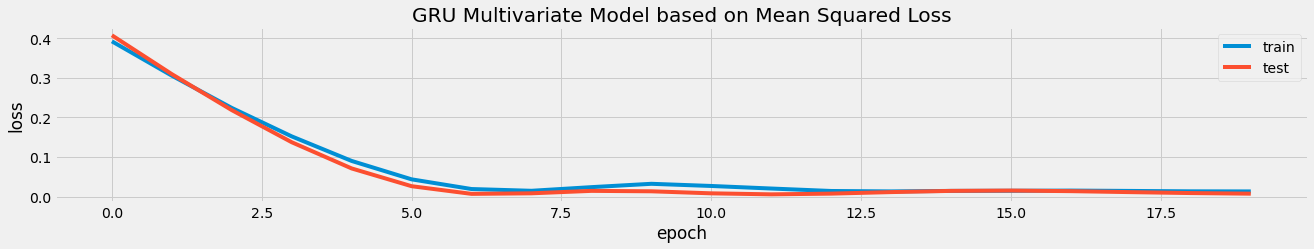

In [358]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Multivariate Model based on Mean Squared Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [359]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_GRU_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_GRU_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('GRU_Multivariate_MAE (When loss=mse)')
v1.append(mae_GRU_multivariate)
name1s.append('GRU_Multivariate_MSE (When loss=mse)')
v1s.append(mae_GRU_multivariate1)
print('Test MAE: %.5f' % mae_GRU_multivariate)
print('Test MSE: %.5f' % mae_GRU_multivariate1)



Test MAE: 0.51956
Test MSE: 0.42654


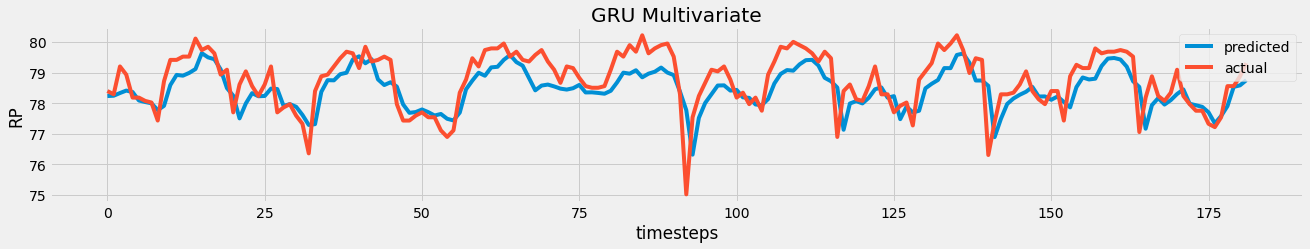

In [360]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('GRU Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# RBFN


## Univariate

In [361]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [362]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [363]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mae', optimizer='adam')

In [364]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 0s - loss: 2.1752 - val_loss: 2.0724
Epoch 2/20
18/18 - 0s - loss: 1.9804 - val_loss: 1.8838
Epoch 3/20
18/18 - 0s - loss: 1.7878 - val_loss: 1.6979
Epoch 4/20
18/18 - 0s - loss: 1.5976 - val_loss: 1.5146
Epoch 5/20
18/18 - 0s - loss: 1.4101 - val_loss: 1.3342
Epoch 6/20
18/18 - 0s - loss: 1.2253 - val_loss: 1.1566
Epoch 7/20
18/18 - 0s - loss: 1.0432 - val_loss: 0.9818
Epoch 8/20
18/18 - 0s - loss: 0.8637 - val_loss: 0.8096
Epoch 9/20
18/18 - 0s - loss: 0.6868 - val_loss: 0.6401
Epoch 10/20
18/18 - 0s - loss: 0.5125 - val_loss: 0.4732
Epoch 11/20
18/18 - 0s - loss: 0.3423 - val_loss: 0.3115
Epoch 12/20
18/18 - 0s - loss: 0.1883 - val_loss: 0.1718
Epoch 13/20
18/18 - 0s - loss: 0.1108 - val_loss: 0.1122
Epoch 14/20
18/18 - 0s - loss: 0.1044 - val_loss: 0.1023
Epoch 15/20
18/18 - 0s - loss: 0.1076 - val_loss: 0.1040
Epoch 16/20
18/18 - 0s - loss: 0.1061 - val_loss: 0.1052
Epoch 17/20
18/18 - 0s - loss: 0.1045 - val_loss: 0.1045
Epoch 18/20
18/18 - 0s - loss: 0.1037 - 

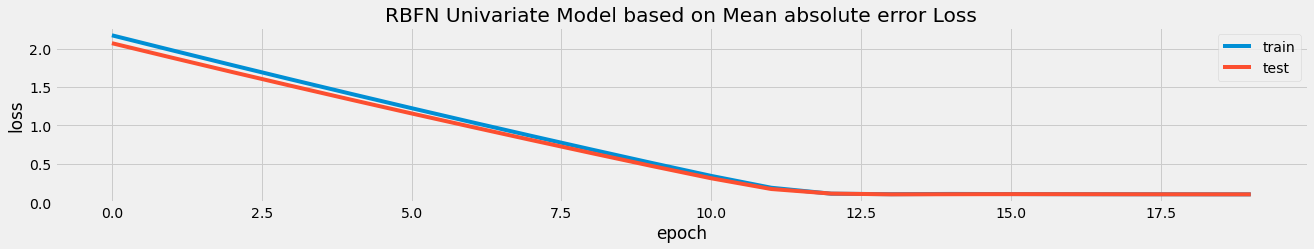

In [365]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Univariate Model based on Mean absolute error Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [366]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [367]:
# calculate RMSE
mae_RBFN_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('RBFN_Univariate_MAE (When loss=mae)')
v.append(mae_RBFN_univariate)
nam.append('RBNF_Univariate_MSE (When loss=mae)')
vs.append(mae_RBFN_univariate1)
print('Test MAE: %.5f' % mae_RBFN_univariate)
print('Test MSE: %.5f' % mae_RBFN_univariate1)



Test MAE: 0.76763
Test MSE: 0.83587


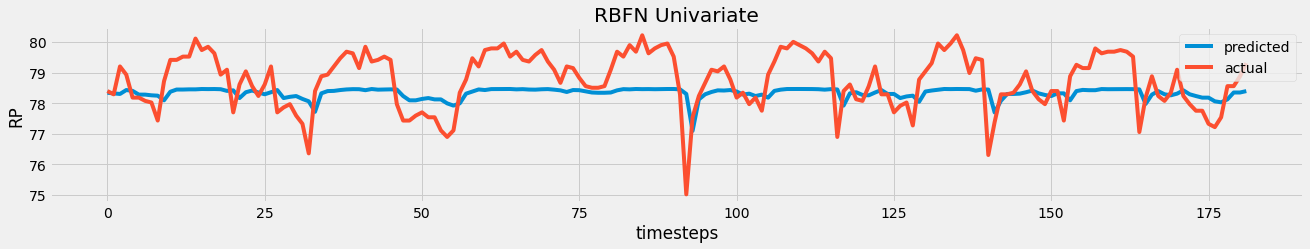

In [368]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

In [369]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

In [370]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 0s - loss: 0.0479 - val_loss: 0.0481
Epoch 2/20
18/18 - 1s - loss: 0.0400 - val_loss: 0.0347
Epoch 3/20
18/18 - 0s - loss: 0.0429 - val_loss: 0.0349
Epoch 4/20
18/18 - 0s - loss: 0.0423 - val_loss: 0.0360
Epoch 5/20
18/18 - 0s - loss: 0.0410 - val_loss: 0.0356
Epoch 6/20
18/18 - 0s - loss: 0.0403 - val_loss: 0.0348
Epoch 7/20
18/18 - 0s - loss: 0.0397 - val_loss: 0.0342
Epoch 8/20
18/18 - 0s - loss: 0.0390 - val_loss: 0.0337
Epoch 9/20
18/18 - 0s - loss: 0.0384 - val_loss: 0.0332
Epoch 10/20
18/18 - 0s - loss: 0.0377 - val_loss: 0.0326
Epoch 11/20
18/18 - 0s - loss: 0.0371 - val_loss: 0.0321
Epoch 12/20
18/18 - 0s - loss: 0.0365 - val_loss: 0.0316
Epoch 13/20
18/18 - 0s - loss: 0.0359 - val_loss: 0.0311
Epoch 14/20
18/18 - 0s - loss: 0.0352 - val_loss: 0.0306
Epoch 15/20
18/18 - 0s - loss: 0.0346 - val_loss: 0.0301
Epoch 16/20
18/18 - 0s - loss: 0.0340 - val_loss: 0.0296
Epoch 17/20
18/18 - 0s - loss: 0.0335 - val_loss: 0.0291
Epoch 18/20
18/18 - 0s - loss: 0.0329 - 

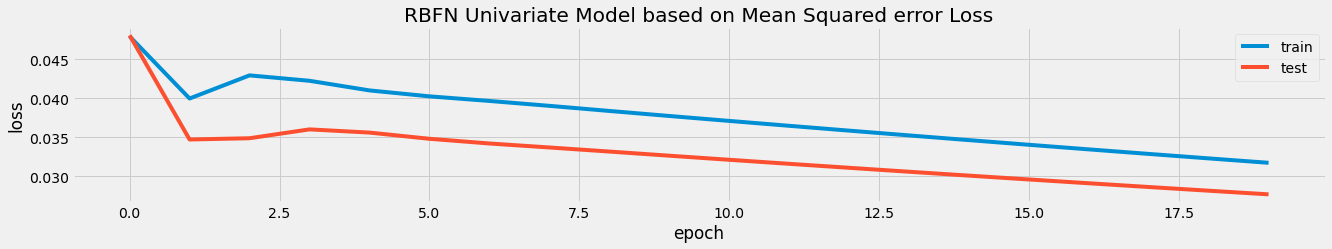

In [371]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Univariate Model based on Mean Squared error Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [372]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [373]:
# calculate RMSE
mae_RBFN_univariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('RBFN_Univariate_MAE (When loss=mse)')
v.append(mae_RBFN_univariate)
nam.append('RBNF_Univariate_MSE (When loss=mse)')
vs.append(mae_RBFN_univariate1)
print('Test MAE: %.5f' % mae_RBFN_univariate)
print('Test MSE: %.5f' % mae_RBFN_univariate1)

Test MAE: 1.03641
Test MSE: 1.55731


## Multivariate

(1200, 1, 2) (1200,) (182, 1, 2) (182,)
Epoch 1/20
18/18 - 0s - loss: 0.6372 - val_loss: 0.6155
Epoch 2/20
18/18 - 0s - loss: 0.4487 - val_loss: 0.4348
Epoch 3/20
18/18 - 0s - loss: 0.2740 - val_loss: 0.2679
Epoch 4/20
18/18 - 0s - loss: 0.1675 - val_loss: 0.1727
Epoch 5/20
18/18 - 0s - loss: 0.1506 - val_loss: 0.1468
Epoch 6/20
18/18 - 0s - loss: 0.1533 - val_loss: 0.1435
Epoch 7/20
18/18 - 0s - loss: 0.1522 - val_loss: 0.1434
Epoch 8/20
18/18 - 0s - loss: 0.1493 - val_loss: 0.1423
Epoch 9/20
18/18 - 0s - loss: 0.1464 - val_loss: 0.1397
Epoch 10/20
18/18 - 0s - loss: 0.1438 - val_loss: 0.1363
Epoch 11/20
18/18 - 0s - loss: 0.1416 - val_loss: 0.1335
Epoch 12/20
18/18 - 0s - loss: 0.1394 - val_loss: 0.1314
Epoch 13/20
18/18 - 0s - loss: 0.1370 - val_loss: 0.1296
Epoch 14/20
18/18 - 0s - loss: 0.1342 - val_loss: 0.1270
Epoch 15/20
18/18 - 0s - loss: 0.1318 - val_loss: 0.1245
Epoch 16/20
18/18 - 0s - loss: 0.1296 - val_loss: 0.1225
Epoch 17/20
18/18 - 0s - loss: 0.1273 - val_loss: 0.1207


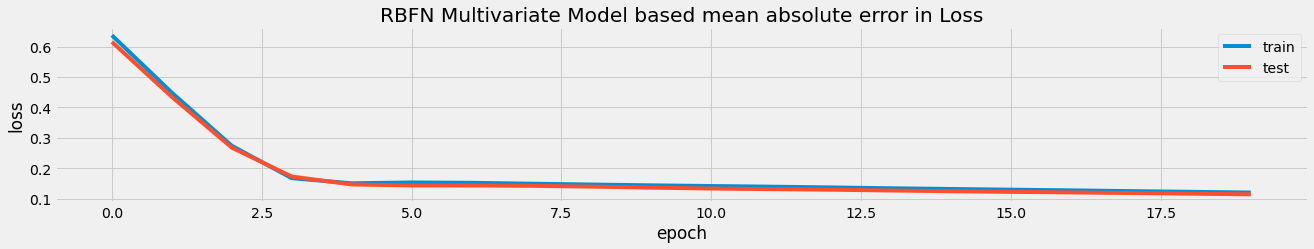

Test MAE: 0.85706
Test MSE: 1.08482


In [374]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mae', optimizer='adam')


# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Multivariate Model based mean absolute error in Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

mae_RBFN_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('RBFN_Multivariate_MAE (When loss=mae)')
v1.append(mae_RBFN_multivariate)
name1s.append('RBNF_Multivariate_MSE (When loss=mae)')
v1s.append(mae_RBFN_multivariate1)
print('Test MAE: %.5f' % mae_RBFN_multivariate)
print('Test MSE: %.5f' % mae_RBFN_multivariate1)


In [375]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [376]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.losses import binary_crossentropy

model = Sequential()
model.add(Flatten(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(RBFLayer(10, 0.5))
model.add(Dense(1, activation = "linear"))
model.compile(loss='mse', optimizer='adam')

In [377]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 0s - loss: 0.0799 - val_loss: 0.0732
Epoch 2/20
18/18 - 0s - loss: 0.0497 - val_loss: 0.0463
Epoch 3/20
18/18 - 0s - loss: 0.0531 - val_loss: 0.0446
Epoch 4/20
18/18 - 0s - loss: 0.0515 - val_loss: 0.0456
Epoch 5/20
18/18 - 0s - loss: 0.0487 - val_loss: 0.0443
Epoch 6/20
18/18 - 0s - loss: 0.0465 - val_loss: 0.0421
Epoch 7/20
18/18 - 0s - loss: 0.0447 - val_loss: 0.0403
Epoch 8/20
18/18 - 0s - loss: 0.0429 - val_loss: 0.0387
Epoch 9/20
18/18 - 0s - loss: 0.0411 - val_loss: 0.0371
Epoch 10/20
18/18 - 0s - loss: 0.0393 - val_loss: 0.0355
Epoch 11/20
18/18 - 0s - loss: 0.0377 - val_loss: 0.0340
Epoch 12/20
18/18 - 0s - loss: 0.0360 - val_loss: 0.0326
Epoch 13/20
18/18 - 0s - loss: 0.0345 - val_loss: 0.0312
Epoch 14/20
18/18 - 0s - loss: 0.0330 - val_loss: 0.0299
Epoch 15/20
18/18 - 0s - loss: 0.0316 - val_loss: 0.0286
Epoch 16/20
18/18 - 0s - loss: 0.0303 - val_loss: 0.0274
Epoch 17/20
18/18 - 0s - loss: 0.0290 - val_loss: 0.0263
Epoch 18/20
18/18 - 0s - loss: 0.0278 - 

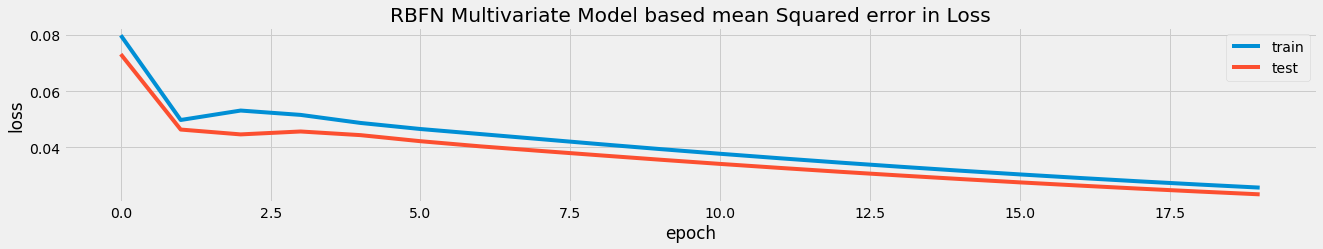

In [378]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RBFN Multivariate Model based mean Squared error in Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [379]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE

In [380]:
mae_RBFN_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_RBFN_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('RBFN_Multivariate_MAE (When loss=mse)')
v1.append(mae_RBFN_multivariate)
name1s.append('RBNF_Multivariate_MSE (When loss=mse)')
v1s.append(mae_RBFN_multivariate1)
print('Test MAE: %.5f' % mae_RBFN_multivariate)
print('Test MSE: %.5f' % mae_RBFN_multivariate1)

Test MAE: 0.93463
Test MSE: 1.30332


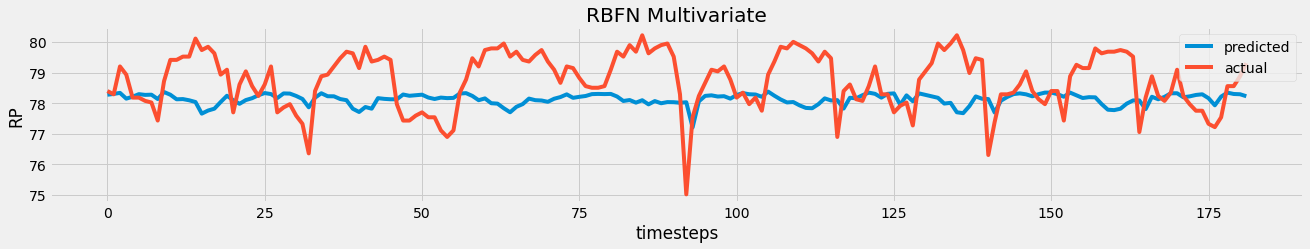

In [381]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('RBFN Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# LSTM

## Univariate

In [382]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 1) (1200,) (182, 1, 1) (182,)


In [383]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [384]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 1s - loss: 0.5870 - val_loss: 0.5940
Epoch 2/20
18/18 - 0s - loss: 0.4524 - val_loss: 0.4397
Epoch 3/20
18/18 - 0s - loss: 0.2920 - val_loss: 0.2464
Epoch 4/20
18/18 - 0s - loss: 0.1186 - val_loss: 0.0746
Epoch 5/20
18/18 - 0s - loss: 0.0932 - val_loss: 0.0708
Epoch 6/20
18/18 - 0s - loss: 0.0915 - val_loss: 0.0786
Epoch 7/20
18/18 - 0s - loss: 0.0889 - val_loss: 0.0706
Epoch 8/20
18/18 - 0s - loss: 0.0904 - val_loss: 0.0730
Epoch 9/20
18/18 - 0s - loss: 0.0884 - val_loss: 0.0723
Epoch 10/20
18/18 - 0s - loss: 0.0878 - val_loss: 0.0715
Epoch 11/20
18/18 - 0s - loss: 0.0860 - val_loss: 0.0697
Epoch 12/20
18/18 - 0s - loss: 0.0862 - val_loss: 0.0715
Epoch 13/20
18/18 - 0s - loss: 0.0850 - val_loss: 0.0685
Epoch 14/20
18/18 - 0s - loss: 0.0858 - val_loss: 0.0680
Epoch 15/20
18/18 - 0s - loss: 0.0842 - val_loss: 0.0682
Epoch 16/20
18/18 - 0s - loss: 0.0825 - val_loss: 0.0677
Epoch 17/20
18/18 - 0s - loss: 0.0828 - val_loss: 0.0671
Epoch 18/20
18/18 - 0s - loss: 0.0825 - 

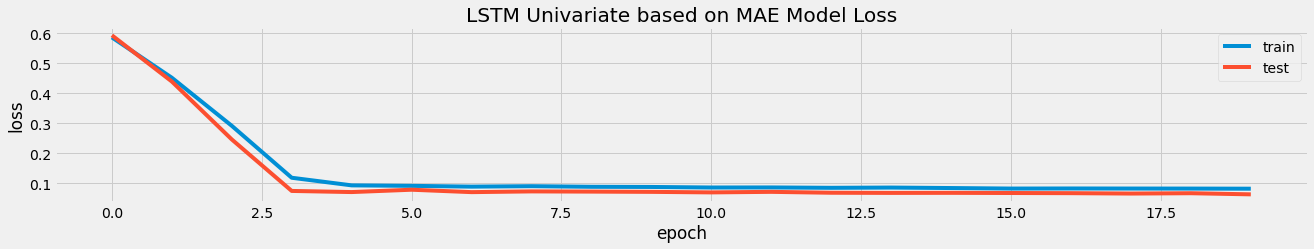

In [385]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Univariate based on MAE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [386]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
lstm_mae_lstm_univariate = mean_absolute_error(inv_y, inv_yhat)
lstm_mae_lstm_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('LSTM_Univariate_MAE (When loss=mae)')
v.append(lstm_mae_lstm_univariate)
nam.append('LSTM_Univariate_MSE (When loss=mae)')
vs.append(lstm_mae_lstm_univariate1)
print('Test MAE: %.5f' % lstm_mae_lstm_univariate)
print('Test MSE: %.5f' % lstm_mae_lstm_univariate1)

Test MAE: 0.47389
Test MSE: 0.42479


(1200, 1, 1) (1200,) (182, 1, 1) (182,)
Epoch 1/20
18/18 - 1s - loss: 0.3474 - val_loss: 0.3420
Epoch 2/20
18/18 - 0s - loss: 0.2055 - val_loss: 0.1894
Epoch 3/20
18/18 - 0s - loss: 0.0961 - val_loss: 0.0775
Epoch 4/20
18/18 - 0s - loss: 0.0320 - val_loss: 0.0222
Epoch 5/20
18/18 - 0s - loss: 0.0123 - val_loss: 0.0095
Epoch 6/20
18/18 - 0s - loss: 0.0128 - val_loss: 0.0086
Epoch 7/20
18/18 - 0s - loss: 0.0131 - val_loss: 0.0091
Epoch 8/20
18/18 - 0s - loss: 0.0128 - val_loss: 0.0095
Epoch 9/20
18/18 - 0s - loss: 0.0126 - val_loss: 0.0093
Epoch 10/20
18/18 - 0s - loss: 0.0125 - val_loss: 0.0093
Epoch 11/20
18/18 - 0s - loss: 0.0124 - val_loss: 0.0091
Epoch 12/20
18/18 - 0s - loss: 0.0124 - val_loss: 0.0091
Epoch 13/20
18/18 - 0s - loss: 0.0122 - val_loss: 0.0090
Epoch 14/20
18/18 - 0s - loss: 0.0119 - val_loss: 0.0089
Epoch 15/20
18/18 - 0s - loss: 0.0124 - val_loss: 0.0089
Epoch 16/20
18/18 - 0s - loss: 0.0118 - val_loss: 0.0089
Epoch 17/20
18/18 - 0s - loss: 0.0117 - val_loss: 0.0088


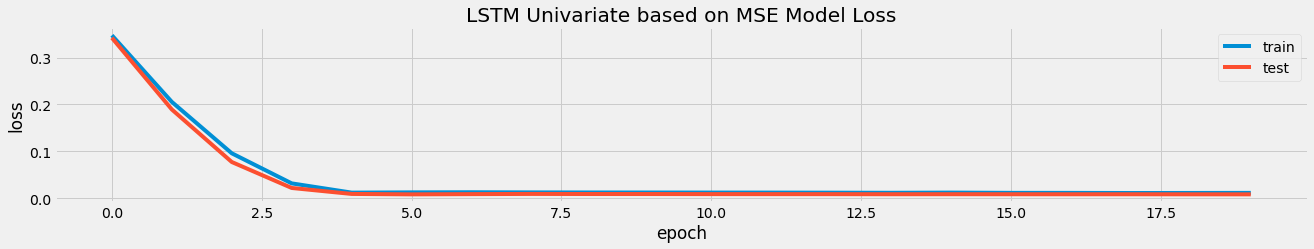

Test MAE: 0.55325
Test MSE: 0.48539


In [387]:
values = reframed_nov_apr_uni.values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Univariate based on MSE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 1))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
lstm_mae_lstm_univariate = mean_absolute_error(inv_y, inv_yhat)
lstm_mae_lstm_univariate1 = mean_squared_error(inv_y, inv_yhat)

name.append('LSTM_Univariate_MAE (When loss=mse)')
v.append(lstm_mae_lstm_univariate)
nam.append('LSTM_Univariate_MSE (When loss=mse)')
vs.append(lstm_mae_lstm_univariate1)
print('Test MAE: %.5f' % lstm_mae_lstm_univariate)
print('Test MSE: %.5f' % lstm_mae_lstm_univariate1)



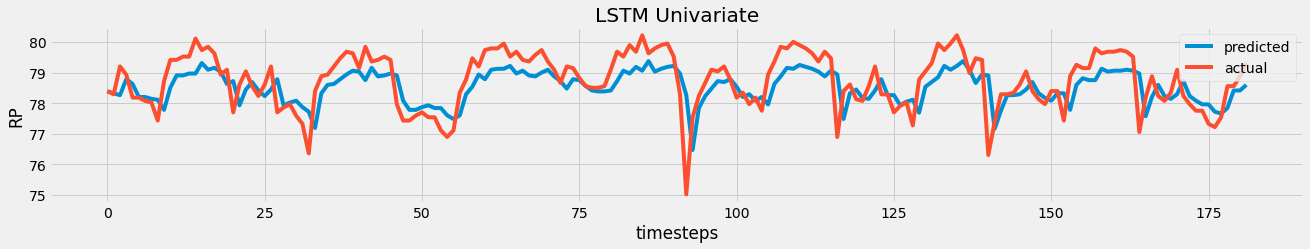

In [388]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Univariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

## Multivariate

In [389]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(1200, 1, 2) (1200,) (182, 1, 2) (182,)


In [390]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [391]:
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
18/18 - 1s - loss: 0.5639 - val_loss: 0.5457
Epoch 2/20
18/18 - 0s - loss: 0.3865 - val_loss: 0.3337
Epoch 3/20
18/18 - 0s - loss: 0.1690 - val_loss: 0.0751
Epoch 4/20
18/18 - 0s - loss: 0.0831 - val_loss: 0.0561
Epoch 5/20
18/18 - 0s - loss: 0.0926 - val_loss: 0.0663
Epoch 6/20
18/18 - 0s - loss: 0.0830 - val_loss: 0.0592
Epoch 7/20
18/18 - 0s - loss: 0.0861 - val_loss: 0.0613
Epoch 8/20
18/18 - 0s - loss: 0.0862 - val_loss: 0.0604
Epoch 9/20
18/18 - 0s - loss: 0.0839 - val_loss: 0.0581
Epoch 10/20
18/18 - 0s - loss: 0.0852 - val_loss: 0.0623
Epoch 11/20
18/18 - 0s - loss: 0.0837 - val_loss: 0.0586
Epoch 12/20
18/18 - 0s - loss: 0.0846 - val_loss: 0.0600
Epoch 13/20
18/18 - 0s - loss: 0.0832 - val_loss: 0.0608
Epoch 14/20
18/18 - 0s - loss: 0.0819 - val_loss: 0.0578
Epoch 15/20
18/18 - 0s - loss: 0.0835 - val_loss: 0.0596
Epoch 16/20
18/18 - 0s - loss: 0.0840 - val_loss: 0.0586
Epoch 17/20
18/18 - 0s - loss: 0.0827 - val_loss: 0.0574
Epoch 18/20
18/18 - 0s - loss: 0.0830 - 

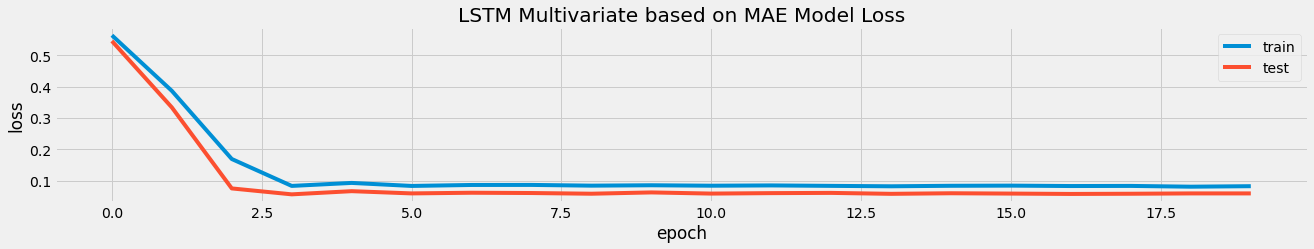

In [392]:
# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Multivariate based on MAE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [393]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_LSTM_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_LSTM_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('LSTM_Multivariate_MAE (When loss=mae)')
v1.append(mae_LSTM_multivariate)
name1s.append('LSTM_Multivariate_MSE (When loss=mae)')
v1s.append(mae_LSTM_multivariate1)
print('Test MAE: %.5f' % mae_LSTM_multivariate)
print('Test MSE: %.5f' % mae_LSTM_multivariate1)


Test MAE: 0.44345
Test MSE: 0.36111


(1200, 1, 2) (1200,) (182, 1, 2) (182,)
Epoch 1/20
18/18 - 1s - loss: 0.3826 - val_loss: 0.3593
Epoch 2/20
18/18 - 0s - loss: 0.2028 - val_loss: 0.1729
Epoch 3/20
18/18 - 0s - loss: 0.0762 - val_loss: 0.0517
Epoch 4/20
18/18 - 0s - loss: 0.0178 - val_loss: 0.0099
Epoch 5/20
18/18 - 0s - loss: 0.0110 - val_loss: 0.0061
Epoch 6/20
18/18 - 0s - loss: 0.0133 - val_loss: 0.0067
Epoch 7/20
18/18 - 0s - loss: 0.0125 - val_loss: 0.0076
Epoch 8/20
18/18 - 0s - loss: 0.0119 - val_loss: 0.0075
Epoch 9/20
18/18 - 0s - loss: 0.0125 - val_loss: 0.0071
Epoch 10/20
18/18 - 0s - loss: 0.0115 - val_loss: 0.0070
Epoch 11/20
18/18 - 0s - loss: 0.0119 - val_loss: 0.0071
Epoch 12/20
18/18 - 0s - loss: 0.0115 - val_loss: 0.0071
Epoch 13/20
18/18 - 0s - loss: 0.0122 - val_loss: 0.0073
Epoch 14/20
18/18 - 0s - loss: 0.0118 - val_loss: 0.0073
Epoch 15/20
18/18 - 0s - loss: 0.0117 - val_loss: 0.0071
Epoch 16/20
18/18 - 0s - loss: 0.0116 - val_loss: 0.0070
Epoch 17/20
18/18 - 0s - loss: 0.0122 - val_loss: 0.0072


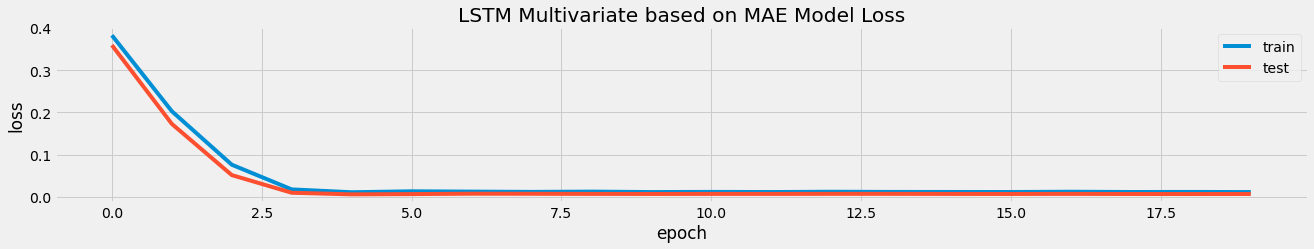

Test MAE: 0.48435
Test MSE: 0.39429


In [394]:
values = reframed_nov_apr.drop('var1(t-1)',axis=1).values

n_train_time = 1200
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Multivariate based on MAE Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 2))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mae_LSTM_multivariate = mean_absolute_error(inv_y, inv_yhat)
mae_LSTM_multivariate1 = mean_squared_error(inv_y, inv_yhat)

name1.append('LSTM_Multivariate_MAE (When loss=mse)')
v1.append(mae_LSTM_multivariate)
name1s.append('LSTM_Multivariate_MSE (When loss=mse)')
v1s.append(mae_LSTM_multivariate1)
print('Test MAE: %.5f' % mae_LSTM_multivariate)
print('Test MSE: %.5f' % mae_LSTM_multivariate1)


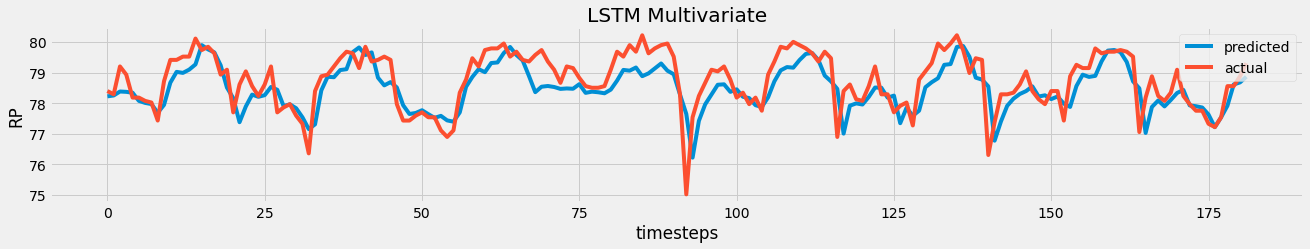

In [395]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(inv_yhat)
plt.plot(inv_y)
plt.title('LSTM Multivariate')
plt.ylabel('RP')
plt.xlabel('timesteps')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# ARIMA

# Univariate

In [396]:
!pip install statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [397]:
# Define the p, d and q parameters to take any value between 0 and 2
p=d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [398]:
# parameters ARIMA(1, 0, 0)x(1, 1, 1, 12)
mod = sm.tsa.statespace.SARIMAX(nov_apr_resample['RP'],
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7411      0.017     42.709      0.000       0.707       0.775
ar.S.L12      -0.1775      0.023     -7.863      0.000      -0.222      -0.133
ma.S.L12      -0.9628      0.007   -128.410      0.000      -0.978      -0.948
sigma2         1.2032      0.030     39.708      0.000       1.144       1.263


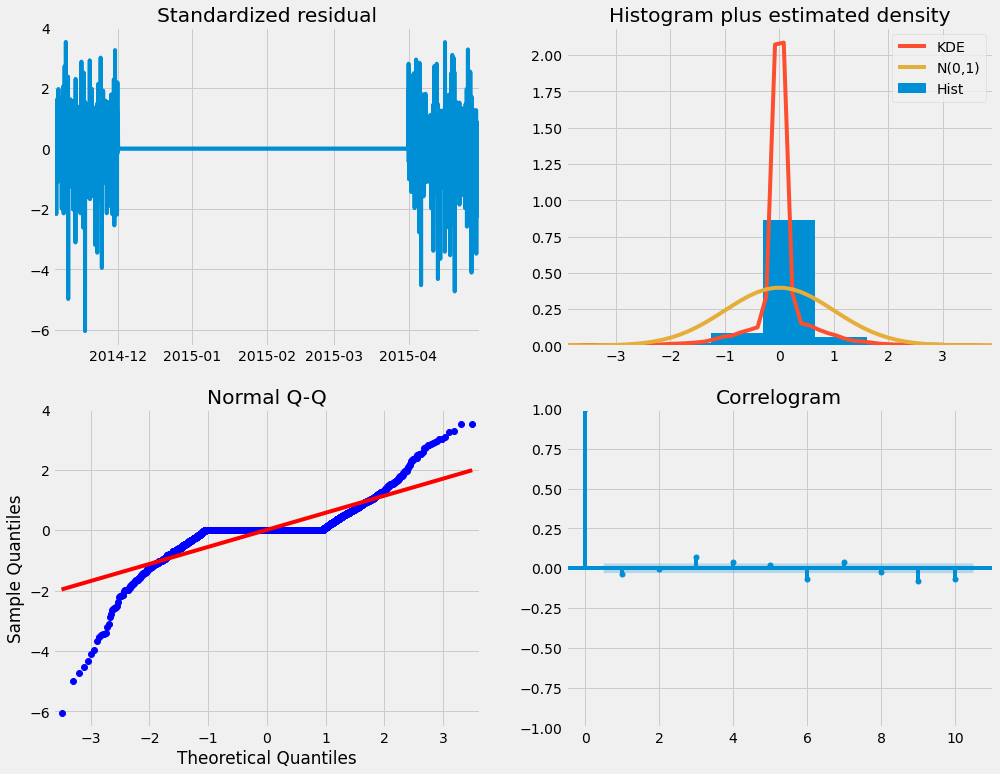

In [399]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [400]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

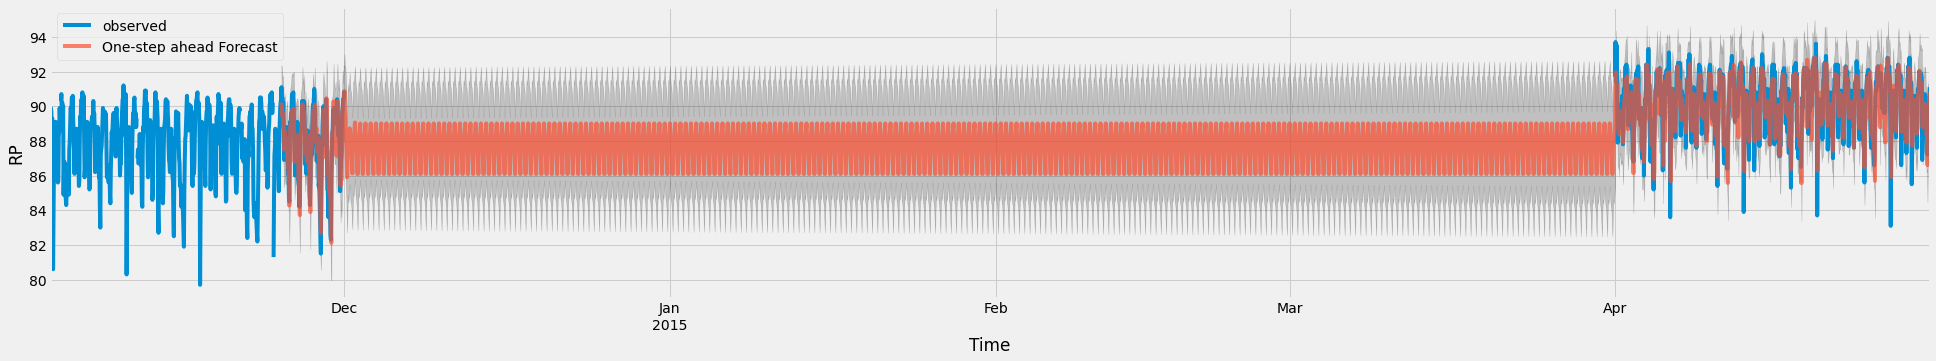

In [401]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [402]:
y_forecasted = pred.predicted_mean
y_truth = nov_apr_resample['RP']['2014-11-25':]

In [403]:
ARIMA_univariate_nov_apr_mse= (abs(y_truth - y_forecasted)).mean()

In [404]:
y_forecasted.astype("float")

time_corrected
2014-11-25 00:00:00    90.203091
2014-11-25 01:00:00    89.906825
2014-11-25 02:00:00    89.447907
2014-11-25 03:00:00    89.619796
2014-11-25 04:00:00    89.286124
                         ...    
2015-04-30 19:00:00    89.161969
2015-04-30 20:00:00    88.760633
2015-04-30 21:00:00    89.877375
2015-04-30 22:00:00    90.115002
2015-04-30 23:00:00    90.807066
Freq: H, Length: 3768, dtype: float64

In [405]:
name.append('Arima univariate model MAE')
v.append(ARIMA_univariate_nov_apr_mse)
print("Arima univariate model MAE",ARIMA_univariate_nov_apr_mse)

Arima univariate model MAE 0.7978299882112241


In [406]:
MSE=mse=np.mean((abs(y_truth - y_forecasted))**2)
nam.append('Arima univariate model MSE')
vs.append(MSE)
print("MSE is :",MSE)

MSE is : 1.206896768628151


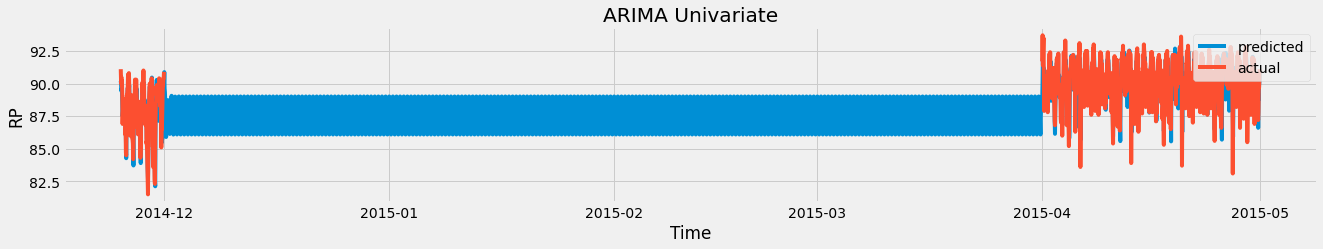

In [407]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_forecasted)
plt.plot(y_truth)
plt.title('ARIMA Univariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

# Multivariate


In [408]:
train =nov_apr_resample.loc[:,'RP']
exog = nov_apr_resample.loc[:,'traffic information']

In [409]:
exog = exog.replace([np.inf, -np.inf], np.nan).fillna(0) 

In [410]:
mod = sm.tsa.statespace.SARIMAX(train, exog=exog.astype('float64'), trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary().tables[1])

                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
traffic information     0.5751      0.041     14.096      0.000       0.495       0.655
ar.S.L12               -0.0459      0.027     -1.719      0.086      -0.098       0.006
ma.S.L12               -0.9885      0.005   -217.317      0.000      -0.997      -0.980
sigma2                  1.2700      0.030     42.029      0.000       1.211       1.329


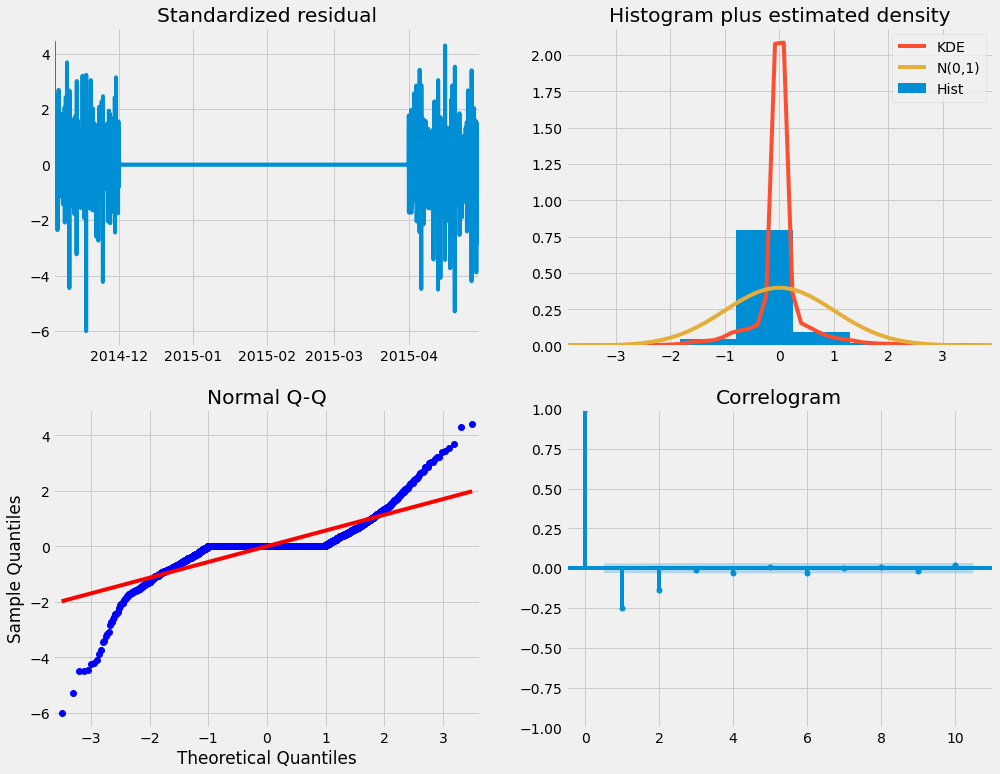

In [411]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [412]:
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

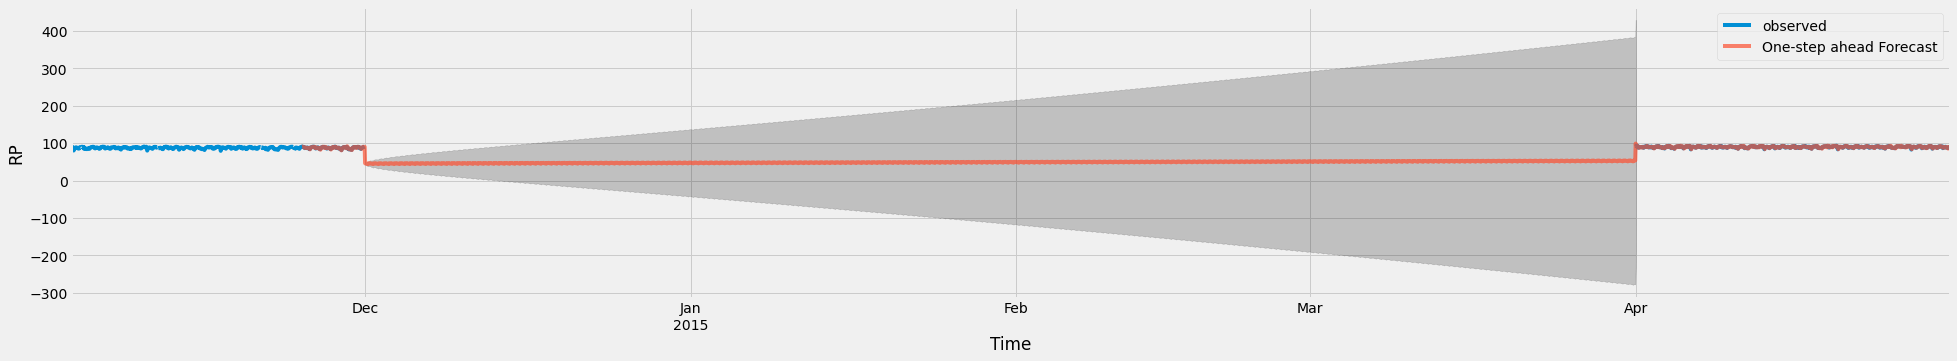

In [413]:
from pylab import rcParams
rcParams['figure.figsize'] = 30, 5
ax = nov_apr_resample['RP'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time')
ax.set_ylabel('RP')
plt.legend()

plt.show()

In [414]:
exog_forecast = nov_apr_resample.loc['2014-11-25':,'traffic information']
exog_forecast = exog_forecast.replace([np.inf, -np.inf], np.nan).fillna(0) 
pred = results.get_prediction(start=pd.to_datetime('2014-11-25 00:00:00'),exog=exog_forecast, dynamic=False)

In [415]:
y_forecasted = pred.predicted_mean
y_truth = nov_apr_resample['RP']['2014-11-25':]

In [416]:
mae_arima_multivariate = abs(y_truth-y_forecasted).mean()

In [417]:
y_forecasted.astype("float")

time_corrected
2014-11-25 00:00:00    90.631825
2014-11-25 01:00:00    90.849511
2014-11-25 02:00:00    89.977929
2014-11-25 03:00:00    90.028813
2014-11-25 04:00:00    89.611529
                         ...    
2015-04-30 19:00:00    89.346531
2015-04-30 20:00:00    88.469057
2015-04-30 21:00:00    90.006060
2015-04-30 22:00:00    89.963483
2015-04-30 23:00:00    90.655926
Freq: H, Length: 3768, dtype: float64

In [418]:
name1.append('Arima Multivariate model MAE')
v1.append(mae_arima_multivariate)
print("Arima Multivariate model MAE",mae_arima_multivariate)

Arima Multivariate model MAE 0.8033551863205933


In [419]:
MSE=np.mean((abs(y_truth - y_forecasted))**2)
name1s.append('Arima Multivariate model MSE')
v1s.append(MSE)
print("MSE is :",MSE)

MSE is : 1.3127680377918827


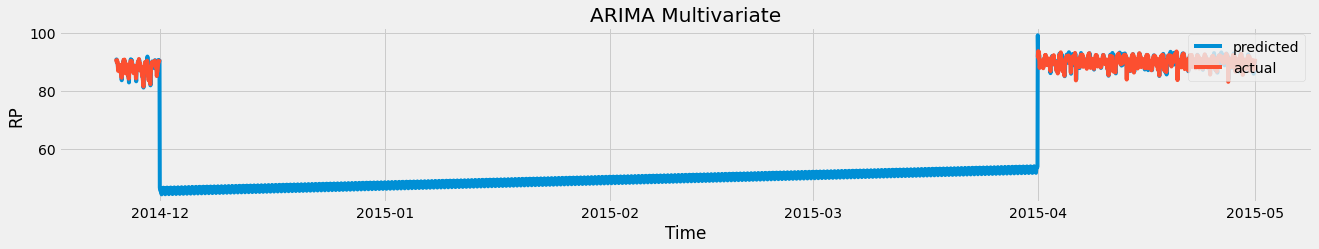

In [420]:
plt.rcParams["figure.figsize"] = (20,3)
plt.plot(y_forecasted)
plt.plot(y_truth)
plt.title('ARIMA Multivariate')
plt.ylabel('RP')
plt.xlabel('Time')
plt.legend(['predicted', 'actual'], loc='upper right')
plt.show()

In [423]:
import pandas as pd
df=pd.DataFrame({'Models Type':name,'Models Error values':v})
df1=pd.DataFrame({'Models Type':nam,'Models Error values':vs})

In [424]:
dff=pd.DataFrame({'Models Type':name1,'Models Error values':v1})
dff1=pd.DataFrame({'Models Type':name1s,'Models Error values':v1s})

In [429]:
df.to_csv("univariate_MAE.csv")
df1.to_csv("univariate_MSE.csv")
dff.to_csv("multivariate_MAE.csv")
dff1.to_csv("multivariate_MSE.csv")

Models Type  Models Error values
0                          MULTI_SVM_MSE             4.876176
1                   DNN_Multivariate_MSE             1.764613
2   GRU_Multivariate_MSE (When loss=mae)             0.483521
3   GRU_Multivariate_MSE (When loss=mse)             0.426541
4  RBNF_Multivariate_MSE (When loss=mae)             1.084816
5  RBNF_Multivariate_MSE (When loss=mse)             1.303325
6  LSTM_Multivariate_MSE (When loss=mae)             0.361107
7  LSTM_Multivariate_MSE (When loss=mse)             0.394289
8           Arima Multivariate model MSE             1.312768

In [141]:
import plotly as px

In [430]:
import plotly.express as px
fig = px.bar(df, x='Models Type', y='Models Error values',color='Models Error values',title="Univariate analysis For MAE")
fig.show()

In [431]:
import plotly.express as px
fig = px.bar(dff, x='Models Type', y='Models Error values',color='Models Error values',title="Multivariate analysisFor MAE")
fig.show()

In [433]:
import plotly.express as px
fig = px.bar(df1, x='Models Type', y='Models Error values',color='Models Error values',title="Univariate analysis For MSE")
fig.show()

In [434]:
import plotly.express as px
fig = px.bar(dff1, x='Models Type', y='Models Error values',color='Models Error values',title="Multivariate analysis For MSE")
fig.show()